<a id='top'></a>

# CSCI3022 S21
# Homework 5: Testing and Confidence
***

**Name**: Jaryd Meek

***

This assignment is due on Canvas by **MIDNIGHT on Friday, April 8**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [15 points] Problem 1 - Time and Testing 

The flowers bloomed early this year in Kyoto, Japan (see: [Washington Post](https://www.washingtonpost.com/weather/2021/03/29/japan-kyoto-cherry-blossoms-record/))  Does this mean anything?


**Part A**: Load in the data set in `kyotoflowers.csv`, a UTF-8 encoded CSV file.  The file contains two columns (with a header).

- `AD`. : Year in Gregorian calendar (Year)
- `Full-flowering date (DOY)` : Full-flowering date in Gregorian calendar (FuFD)

Citations:
Full-flowering Dates of Prunus jamasakura in Kyoto City (Plain Text Version)
(for 9th to 14th centuries: Aono and Saito, 2010; Int. J. Biometeorol.,54, 211-219)
(for 15th to 21st centuries: Aono and Kazui, 2008; Int. J. Climatol., 28, 905-914)

Begin with a **Histogram** of the data.  Label axes and choose an appropriate number of bins.  Does this data appear to be approximately normally distributed?

[]

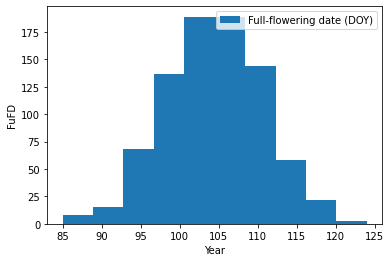

In [2]:
df=pd.read_csv('../data/kyotoflowers.csv', encoding='UTF-8')
ax = df.plot.hist(x='AD', y='Full-flowering date (DOY)')
ax.set_xlabel("Year")
ax.set_ylabel("FuFD")
ax.plot()

**SOLUTION -**
The data does appear to be normally distributed.

**Part B**:Create a line plot where `Year` is the horizontal axis and `FuFD`is the vertical axis.  Do there *visually* appear to be any patterns?

[]

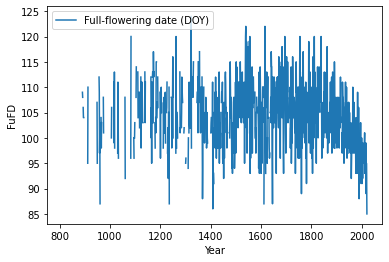

In [3]:
ax = df.plot.line(x='AD', y='Full-flowering date (DOY)')
ax.set_xlabel("Year")
ax.set_ylabel("FuFD")
ax.plot()

**SOLUTION -**
There does seem to be a slight pattern in that in the last 100 years or so (1900-now) the full-flowering date has decreased significantly. 

**Part C**: Print out a Tukey five-number summary for the set of full-flowering dates, as well as its mean and standard deviation.

In [4]:
df['Full-flowering date (DOY)'].describe()

count    833.000000
mean     104.453782
std        6.476146
min       85.000000
25%      100.000000
50%      104.000000
75%      109.000000
max      124.000000
Name: Full-flowering date (DOY), dtype: float64

**Part D**: Suppose we wish to approach the question: is the flowering date becoming *earlier*?  One way to do this might be to generate confidence intervals comparing e.g. the last $n$ years of data to all the years that came before them and ask if they're coming from distributions with the same *means*.

Suppose we take the most recent 12 years of take, from 2010-2021.  What is the mean full-flowering date for those years?  Perform a hypothesis test at $\alpha=0.01$ testing whether or not the mean from this interval is the same as the mean for the prior all-observed years.

Write a sentence interpreting this result.

**Note:** there are a lot of missing observations, especially for centuries ago. Make sure you're properly not including these in any variance/confidence/etc. calculations.

In [5]:
#convert the one dataframe to two dataframes
prior = df.loc[df["AD"]<2010, "Full-flowering date (DOY)"]
recent = df.loc[(df["AD"]>=2010) & (df["AD"]<=2021), "Full-flowering date (DOY)"]

#remove the NANs
prior = prior.dropna()

#Calculate and print
#print( prior.mean())
#print(prior.std(ddof=1))
#print(len(prior))
#print(recent.mean())
#print(recent.std(ddof=1))
#print(len(recent))
print(stats.ttest_ind(prior, recent, equal_var=False))

Ttest_indResult(statistic=8.080903942788986, pvalue=4.0316748692963845e-06)


**SOLUTION -** Our P value is 4.03e-6, which is FAR less than 0.01 needed to reject the null hypothesis. This would mean that according to this test, the trees are flowering sooner.

**Part E**: Was the test in part D appropriate to answer a broad question like "does the full flowering data reflect the presence of global warming?"  What tests could we have run instead?

**SOLUTION -**
The test in part D is not enough to answer the question 100% yes, but it does act as a good start point to continue answering data. A better way would be to run multiple tests (similar to part F) and compare the results to each, to see a trend in relation to the amount of pollutants in the atmosphere.

**Part F**: We should have rejected the null hypothesis in Part D.  But sometimes, people do some shifty things with data.  And we could, too!  One way to be statistically disingenuous is known as $p$-fishing or $p$-hacking.  This process represent the idea of "cherry-picking" through our data to find *subsets* of the data that most support a desired conclusion.

Suppose we - for whatever reason - really wish to use this data set to come to the conclusion that "there is no difference in full flowering datas between now and the past."  To support this conclusion, we devise the following idea:

- Consider *every single* list of 12 consecutive years in the data set, starting with 1600-1611, then 1601-1612, then 1602-1613.
- For *each* one of those 12-year intervals, generate the 99% confidence interval for the difference in the mean `FuFD`  over  those 12 years' to the mean from most recent 12 years from 2010-2021.

From that list of confidence intervals, print out a list of every starting year for an interval that contains zero. (e.g if the confidence interval for comparing 1618-1629 to 2010-2021 contains zero, then print `1618`.  Report:
- The earliest date of such an interval contianing zero.
- The latest date where such an interval **does not** contain zero.

Then write two sentences of how you could interpret those two results to conclude *either* that the flowering dates are getting earlier **or** that they are not getting earlier.

In [6]:
recent = df.loc[(df["AD"]>=2010) & (df["AD"]<=2021), "Full-flowering date (DOY)"]

numRecent = len(recent)
meanRecent = recent.mean()
stdRecent = np.std(recent, ddof=1)

output = []

for x in range(1600, 2010):
    prior = df.loc[(df["AD"]>=x) & (df["AD"]<=x+11), "Full-flowering date (DOY)"]
    prior = prior.dropna()
    
    numPrior = len(prior)
    meanPrior = prior.mean()
    stdPrior = np.std(prior, ddof=1)
    
    degFreedom = numRecent+numPrior -2
    stdErr = np.sqrt((stdRecent**2/numRecent) + (stdPrior**2/numPrior))
    
    
    CI = [(meanRecent-meanPrior) - stats.t.ppf(0.995,degFreedom)*stdErr, (meanRecent-meanPrior) + stats.t.ppf(0.995,degFreedom)*stdErr]
    
    if CI[0] < 0 and CI[1] > 0:
        print(x)
        output.append(x)
        
print("------")
print("EARLIEST - " + str(min(output)))

for x in range(2009, 1600, -1):
    if x not in output:
        latest = x
        break

print("LATEST W/O ZERO - " + str(latest))
print("------")

1601
1625
1971
1972
1976
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
------
EARLIEST - 1601
LATEST W/O ZERO - 1978
------


**SOLUTION -** I could interpret the earliest and latest result to attempt to prove that climate change isn't happening by saying that there is no significant difference between the average flowering date in 1601-1612 and 2010-2021. I could interpret the earliest and latest result to attempt to prove that climate change is happening by saying that in 1978-1989 there was a significant difference in the mean flower dates, meaning that there is climate change occuring. 

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [15 points] Problem 2: Testing and CI Theories; quick problems


#### 2A (5 pts):
Ready the article at the following link: https://tinyurl.com/y6sxe9n8.

(If you have issues, log into the CU-libraries page, and search for the article "The Proposal to Lower P Value Thresholds to .005," by John P. A. Ioannidis from JAMA 2018.)


Then summarize it briefly (4-5 sentences), making sure you also answer the following: in what ways are scientists misusing p-values? Do you agree with the suggestion made in this article? What other suggestions are being made to
use them properly?


**SOLUTION -** People misuse the p value, many people believe/use the p value to say that if their data falls below the p value of 0.05 it is almost false, but this is not what the p value means. It means that it is unlikely. Cons to changing the p value would include the amount of type two error would increase, which would cause scientists and researchers to miss true finding, but pros include that it would create a higher threshold for them to reject the null hypothesis, decreasing the type I error, causing the amount of false research to decrease. Overally, they believe that scientists should be trained better on interpreting results so this doesn't happen. I disagree that they should be changed. 0.05 when interpreted correctly seems to be the best balance.

#### 2B  (2 pts):
In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?   Use **plain English**.

**SOLUTION -**
In general, a 99% confidence interval is wider. The width increases as the confidence interval increases. A wider confidence interval allows for less precise population estimates. 

ELI5 - Since the 99% is bigger than the 95%, the area that the 99% covers is greater than the 95%, this means more of the area is covered by the 99% leading to more error.


#### 2C (2pts):

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate?   **Justify** your answer in complete English sentences.

**SOLUTION -** 
Null Hypothesis - The strength of the carbon is above tolerance (safe)
Alternative Hypothesis - The strength of the carbon is below tolerance (unsafe)

You would rather have a low type II error. Type II error would mean that you the strength of the carbon is below tolerance (UNSAFE) but we determine that it is above tolerance, leading to an unsafe plane, and bad things :( .
Type I error would mean that the strength of the carbon is above (or equal) to tolerance, but we determine that it is below tolerance, this would lead to some lost product or time, but would not result in dangerous planes leavintg the factory. This is why having a low type II error is more important, since type II error puts people at risk.

#### 2D (2pts):

Let $X_1, X_2, \dots X_n$ be independent and identically distributed sample from a normal random variable $N(\mu,1)$.


As you've seen, A 95% confidence interval for $\mu$ is $\bar{x} \pm 1.96 \cdot \frac{1}{\sqrt{n}}$.

Let $p$ denote the probability that an *additional* (or new) independent observation falls within this confidence interval. Is $p$ greater than, less than, or equal to 0.95? Justify your answer with both intuition and a formal mathematical statement.

**SOLUTION -** It would be equal, assuming that the new data point follows the same normal curve, 95% of the data should be captured by the confidence interval, so there should be a 95% chance that the data would fall within the confidence interval.


#### 2E (2pts):
Suppose that 14 people in a sample of 91 are found to be smokers. Calculate the 90% confidence interval
for the *true* proportion of smokers in the population from which this sample originated. Interpret this interval in a plain English sentence.

**SOLUTION -**<br>
Note, 1.645 from Z-score table
$$1.645 * \sqrt{ \frac{ \frac{14}{91} \left( 1- \frac{14}{91} \right) }{91}} \pm \frac{14}{91}$$
$$ = [0.09163, 0.21606]$$

This means that we can be 90% confident that the true proportion of smokers in the population is captured by the interval $[0.09163, 0.21606]$

#### 2F (2pts):
In an 1881 study Michelson and Newcomb measured the time light took to travel 7400
meters. Inspecting their study and the descriptions of their 64 measurements, it is reasonable to assume that the data were iid.  Their measurements contained sample statistics in $\mu s$ (or $\frac{sec}{10^6}$) of **mean** $\bar{X}=27.75$ and **standard deviation** of $s = 5.08.$


Construct an approximate 95% confidence interval for the time light takes to travel 7400 meters.

**SOLUTION -** Z score for 95% confidence interval = 1.96 (found in Z-score table)

$$\bar{X} \pm Z \cdot \frac{s}{\sqrt{n}} $$
 $$=27.75 \pm 1.96 \cdot \frac{5.08}{\sqrt{64}} $$
$$= 27.75 \pm 1.2446 $$
$$=  [26.5054, 28.9946]$$

---

<a id='p3'></a>
[Back to top](#top)

### [15 points] Problem 3 - Nap time?


It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 15 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 15 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 15 & 494.2 & 39.6 \\ 
\textrm{Nap} & 15 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 97.5% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

In [7]:
#Group 1
mean1 = 451.3
std1 = 31.9
num1 = 15
CI1 = [mean1 - stats.t.ppf(0.9875, num1-1) * std1/np.sqrt(num1), mean1 + stats.t.ppf(0.9875, num1-1) * std1/np.sqrt(num1)]

#Group 2
mean2 = 494.2
std2 = 39.6
num2 = 15
CI2 = [mean2 - stats.t.ppf(0.9875, num2-1) * std2/np.sqrt(num2), mean2 + stats.t.ppf(0.9875, num2-1) * std2/np.sqrt(num2)]

#Group 3
mean3 = 492.8
std3 = 45.2
num3 = 15
CI3 = [mean3 - stats.t.ppf(0.9875, num3-1) * std3/np.sqrt(num1), mean3 + stats.t.ppf(0.9875, num3-1) * std3/np.sqrt(num3)]

print("Coffee+Nap = [%.2f, %.2f]" % (CI1[0], CI1[1]))
print("Coffee = [%.2f, %.2f]" % (CI2[0], CI2[1]))
print("Nap = [%.2f, %.2f]" % (CI3[0], CI3[1]))

Coffee+Nap = [430.63, 471.97]
Coffee = [468.54, 519.86]
Nap = [463.51, 522.09]


 1 - Not just with the confidence intervals we have, while they are overlapping, we can't make any conclusions just off of that. There are different tests for that.
 2 - We use a t-score since our population is small, only 15 people in each test.

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [8]:
#nap vs coffee
napMean = 492.8
napStd = 45.2
napNum = 15

coffeeMean = 494.2 
coffeeStd = 39.6
coffeeNum = 15


meanDiff = napMean - coffeeMean 
StdErr = np.sqrt((napStd**2)/napNum + (coffeeStd**2)/coffeeNum)
Tscore = meanDiff / StdErr 
pval = stats.t.cdf(Tscore, napNum + coffeeNum - 2)
print("T = %.2f" % Tscore)
print("p = %.2f" % pval)



T = -0.09
p = 0.46


**SOLUTION -**

We will be performing a hypothesis test for difference in means. Since we are working with a small (<30 usually) population, we will be working with a T test.

X = nap, Y = coffee

$H_0 \rightarrow \mu_x - \mu_y = 0 \\
H_1 \rightarrow \mu_x - \mu_y < 0 $

$T = (\bar{x}_X - \bar{x}_Y)/\sqrt{\frac{s_X^2}{n_X} + \frac{s_Y^2}{n_Y}}$ with $n_X + n_Y - 2$ degrees of freedom. 

Tests -

Rejection Region $\rightarrow$ Since T = $-0.09 > -2.048$, we cannot reject the null, and have insufficient evidence that there is an advantage to taking a nap instead of only drinking coffee. 

P-Value $\rightarrow$ Since p-value $0.46 > 0.025$, we cannot reject the null, and have insufficient evidence that there is an advantage to taking a nap instead of only drinking coffee. 

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [9]:
# coffee-nap versus coffee
coffeeNapMean = 451.3
coffeeNapStd = 31.9
coffeeNapNum = 15

coffeeMean = 494.2 
coffeeStd = 39.6
coffeeNum = 15

meanDiff = coffeeNapMean - coffeeMean 
StdErr = np.sqrt((coffeeNapStd**2)/coffeeNapNum + (coffeeStd**2)/coffeeNum)
Tscore = meanDiff / StdErr 
pval = stats.t.cdf(Tscore, coffeeNapNum + coffeeNum - 2)
print("T = %.2f" % Tscore)
print("p = %.3f" % pval)

T = -3.27
p = 0.001


**SOLUTION -**

Tests - 

Rejection Region $\rightarrow$ Since T = $-3.27 > -2.048$, we reject the null hypothesis, we have sufficient evidence that coffee-naps are better than coffee only.

P-Value $\rightarrow$ Since p-value $0.001 < 0.025$, we reject the null hypothesis, and conclude that we have sufiicient evidence that coffee-naps are better than coffee only. 

In [10]:
# coffee-nap versus nap
coffeeNapMean = 451.3
coffeeNapStd = 31.9
coffeeNapNum = 15

napMean = 492.8
napStd = 45.2
napNum = 15

meanDiff = coffeeNapMean - napMean 
StdErr = np.sqrt((coffeeNapStd**2)/coffeeNapNum + (napStd**2)/napNum)
Tscore = meanDiff / StdErr 
pval = stats.t.cdf(Tscore, coffeeNapNum + napNum - 2)
print("T = %.2f" % Tscore)
print("p = %.3f" % pval)

T = -2.91
p = 0.004


**SOLUTION**
Tests - 

Rejection Region $\rightarrow$ Since T = $-2.91 > -2.048$, we reject the null hypothesis, we have sufficient evidence that coffee-naps are better than naps only.

P-Value $\rightarrow$ Since p-value $0.001 < 0.025$, we reject the null hypothesis, and conclude that we have sufiicient evidence that coffee-naps are better than naps only. 

**Part D**: Generally speaking, we ust $\alpha$ to denote the "probability of error if the null hypothesis is true."  In parts B-C, we performed three hypothesis tests.  Suppost that each of these tests is **independent**, with underlying Probability of type I error of $\alpha=0.025$.  What's the probability that we committed *at least one* Type I error over those 3 tests?  Why might this be important?

**SOLUTION -** <br>
The probability of type I error for one test is 0.025, since the type I error is equal to your alpha level.

$$\text{P(at least one significant result) = 1 − P(no significant results)}$$
$$= 1 − (1 − 0.025)^3$$
$$= 0.073$$


Since we completed three tests, our probability of completing at least one type I error over these tests is 7.3%. This is significant since there is a 7.3% chance that we incorrectly rejected a null hypothesis.